In [330]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [367]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)

def set_face_grid_ax_ticks(g):
    """Set fontsize for x and y axis ticks for all axes in a FacetGrid."""
    for ax in g.axes.flat:
        set_ax_ticks(ax)


def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def common_ax_style(ax):
    ax.set_xticks([1, 4, 8, 16, 30, 60])
    ax.set_xticklabels([1, 4, 8, 16, 30, "30h"])
    
    ax.set_yscale('log')
    # plt.yticks([0.03, 0.1, 0.3, 1])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    set_ax_ticks(ax)
        
    ax.set_xlabel("Threads", fontsize = fontsize)

def plot_data(df, ax):
    sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth = 3, ax = ax)
    sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s = 30, ax = ax, legend=False)


## plot scalability

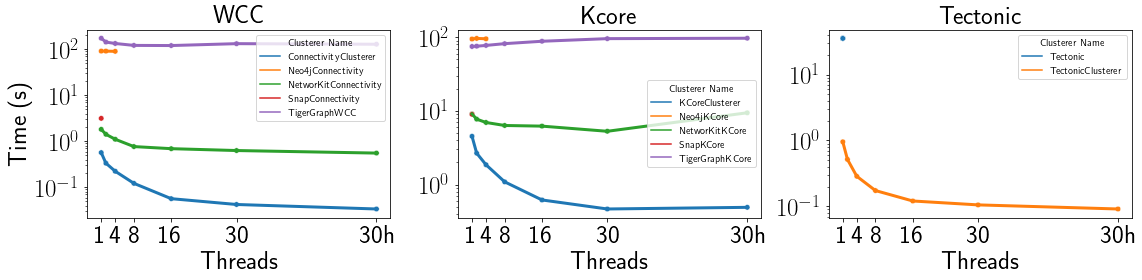

In [158]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
wcc_data = df[df["Clusterer Name"].isin(["ConnectivityClusterer", "SnapConnectivity", "NetworKitConnectivity", "TigerGraphWCC", "Neo4jConnectivity"])]
kcore_data = df[df["Clusterer Name"].isin(["KCoreClusterer", "SnapKCore", "NetworKitKCore", "TigerGraphKCore", "Neo4jKCore"])]
tectonic_data = df[df["Clusterer Name"].isin(["TectonicClusterer", "Tectonic"])]

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(16,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(wcc_data, ax)
common_ax_style(ax)
ax.set_title("WCC", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(kcore_data, ax)
common_ax_style(ax)
ax.set_title("Kcore", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(tectonic_data, ax)
common_ax_style(ax)
ax.set_title("Tectonic", fontsize=fontsize)
ax.set_ylabel("")

plt.tight_layout()
plt.savefig("../results/runtime.pdf")

In [356]:
df_slpa["Clusterer Name"].unique()

array(['Neo4jSLPA', 'SLPAClusterer'], dtype=object)

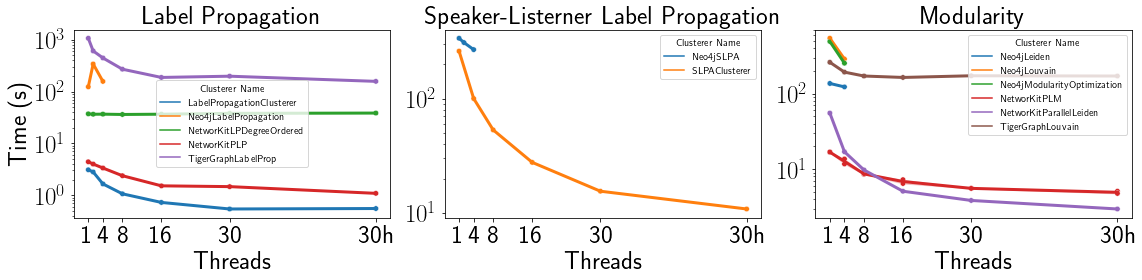

In [351]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_label.csv")
df = df[~df["Clusterer Name"].isin(["SLPAClusterer"])] # SPLAClusterer is using wrong config
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = pd.concat([df, df2])
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)
fontsize=25
# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()

df_lp = df[df["Clusterer Name"].isin(['LabelPropagationClusterer', 'Neo4jLabelPropagation',
                               'NetworKitLPDegreeOrdered', 'NetworKitPLP', 'TigerGraphLabelProp'])]
df_slpa =  df[df["Clusterer Name"].isin(["Neo4jSLPA", "SLPAClusterer", "TigerGraphSLLabelProp"])]
df_modularity = df[df["Clusterer Name"].isin(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
                                              'NetworKitPLM', 'NetworKitParallelLeiden', 'TigerGraphLouvain'])]

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(16,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(df_lp, ax)
common_ax_style(ax)
ax.set_title("Label Propagation", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(df_slpa, ax)
common_ax_style(ax)
ax.set_title("Speaker-Listerner Label Propagation", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(df_modularity, ax)
common_ax_style(ax)
ax.set_title("Modularity", fontsize=fontsize)
ax.set_ylabel("")



plt.tight_layout()
plt.savefig("../results/runtime_lp.pdf")

## LabelProp Study

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/2188555537.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


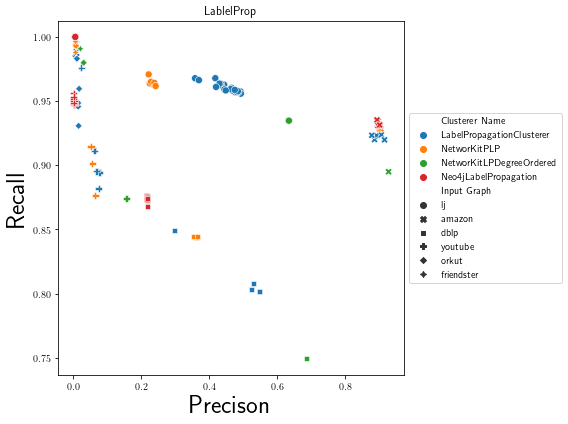

In [46]:

df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - label_stats.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
plt.figure(figsize=(8, 6))  # Set the figure size

# sns.lineplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", legend=False)
sns.scatterplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name", 
                style="Input Graph",s = 50)
# plt.title("TectonicClusterer")
plt.xlabel("Precison", fontsize = fontsize)
plt.ylabel("Recall", fontsize = fontsize)

# plt.xlim(0.3, 0.7)
# plt.ylim(0.7, 1)

plt.title("LablelProp")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig("../results/out_lp_precision_recall.pdf")

/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


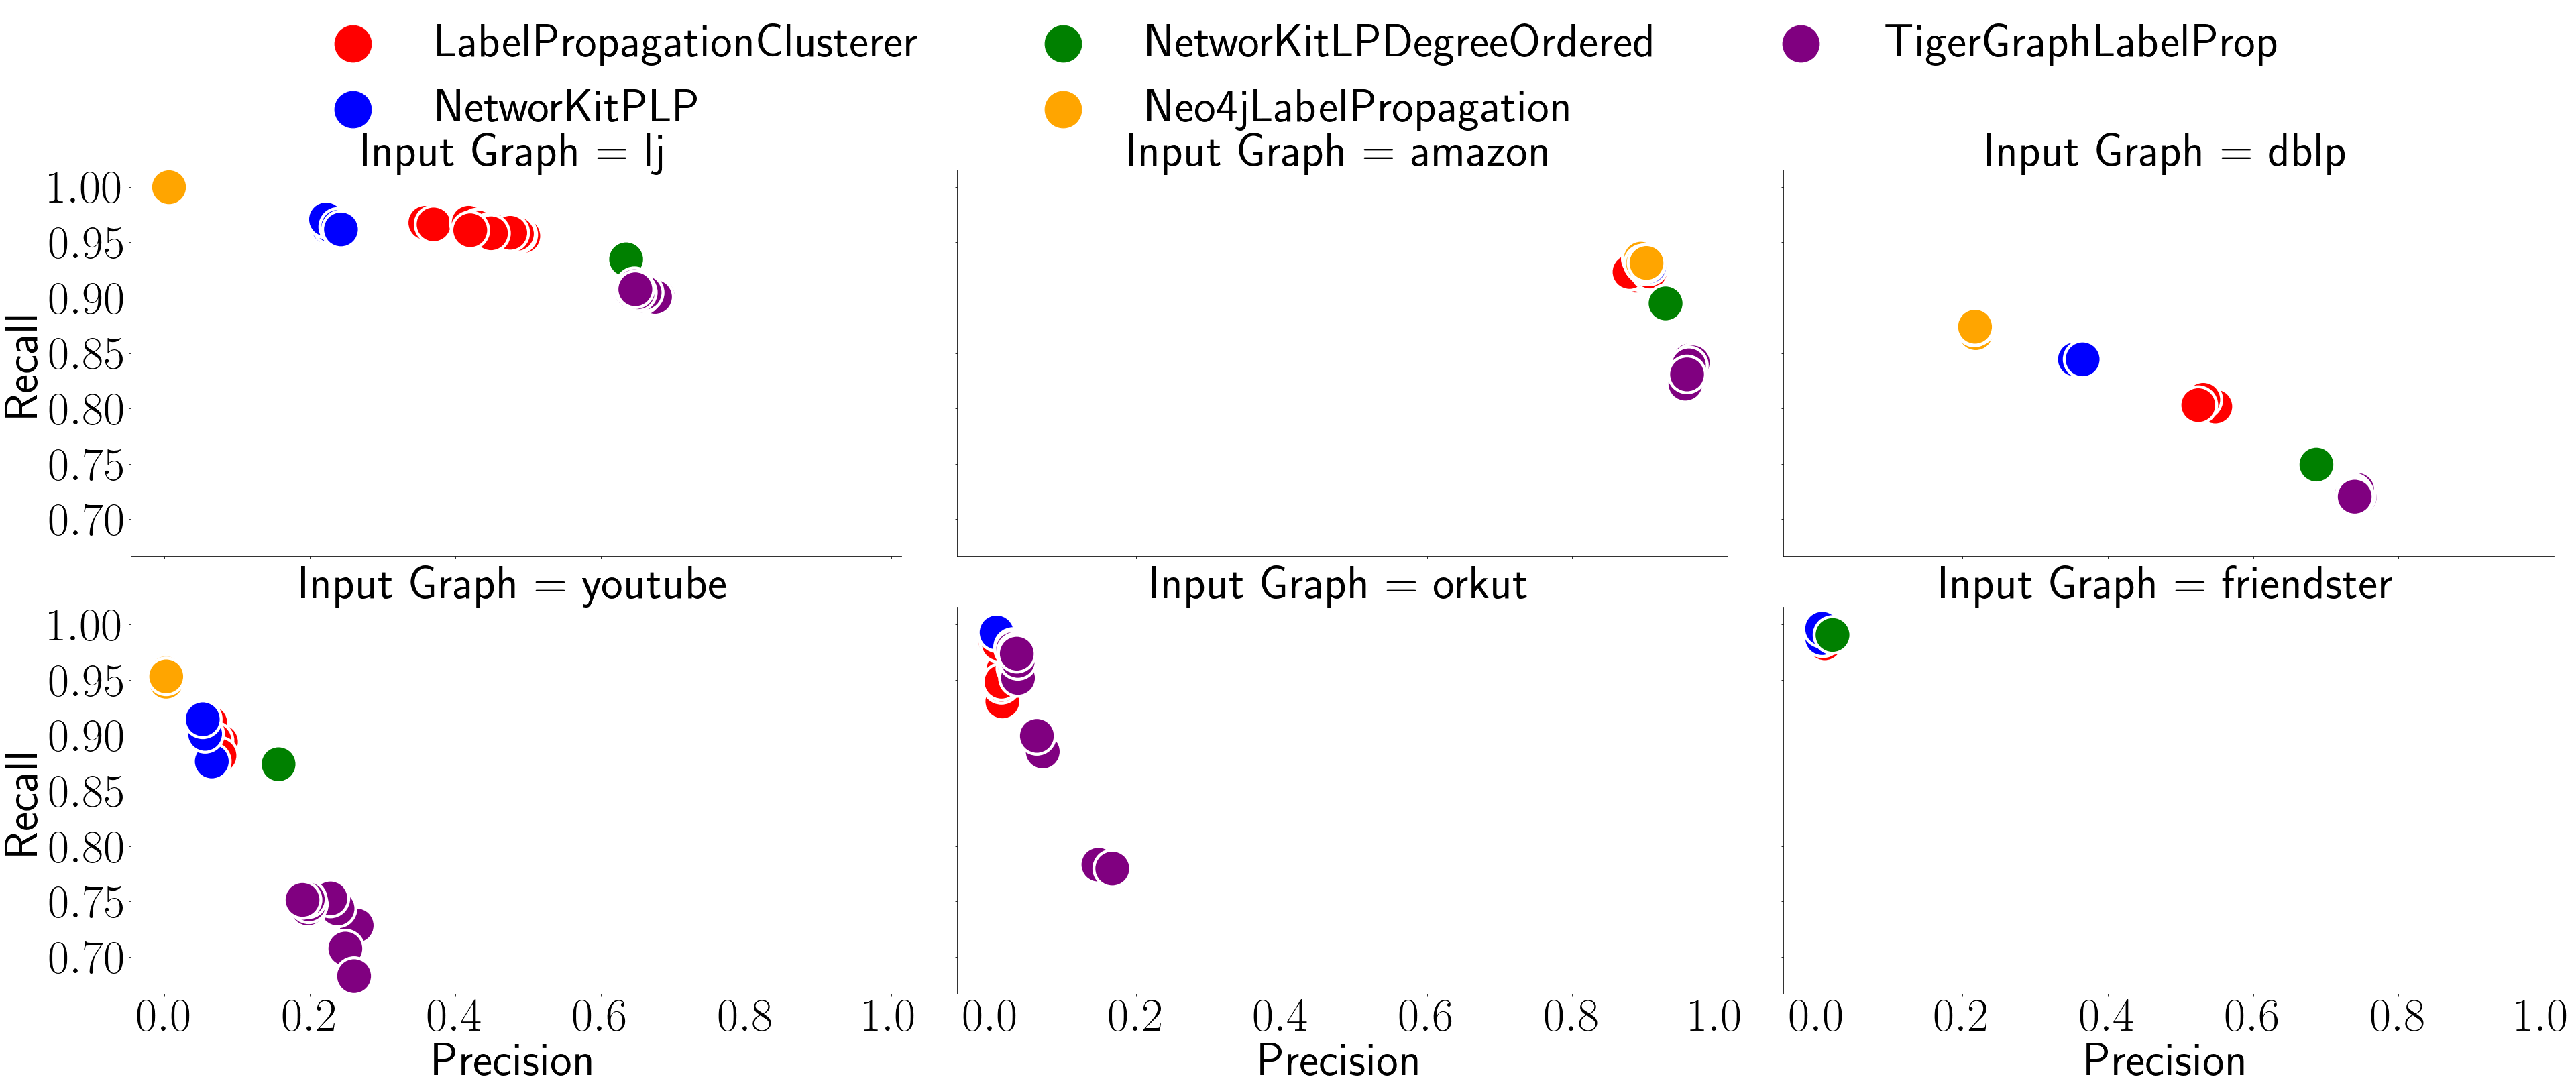

In [218]:

color_dict = {
    'LabelPropagationClusterer': 'red',
    'NetworKitPLP': 'blue',
    'NetworKitLPDegreeOrdered': 'green',
    'Neo4jLabelPropagation': 'orange',
    'TigerGraphLabelProp': 'purple'
}
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - label_stats.csv")
replace_graph_names(df)
df = df[df["Threads"] != 1]
# Create a FacetGrid, one plot per unique value in "Input Graph"
old_fontsize = fontsize
fontsize = 70
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3,height = 10, aspect = 0.4) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=3000, palette=color_dict)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
# g.add_legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), fontsize=fontsize)
# Get the current handles and labels
handles, labels = g.axes[0].get_legend_handles_labels()

# Create larger handles using the scatter method
larger_handles = [g.axes[0].scatter([], [], marker='o', color=h.get_facecolor(), s=3000) for h in handles] # Start from 1 to skip the title

# Now add the modified legend
g.add_legend(handles=larger_handles, labels=labels, loc='upper center', ncol=3, 
             bbox_to_anchor=(0.5, 1.15), fontsize=fontsize)


set_face_grid_ax_ticks(g)
plt.tight_layout()
plt.savefig("../results/out_lp_precision_recall.pdf", bbox_inches='tight')
fontsize = old_fontsize

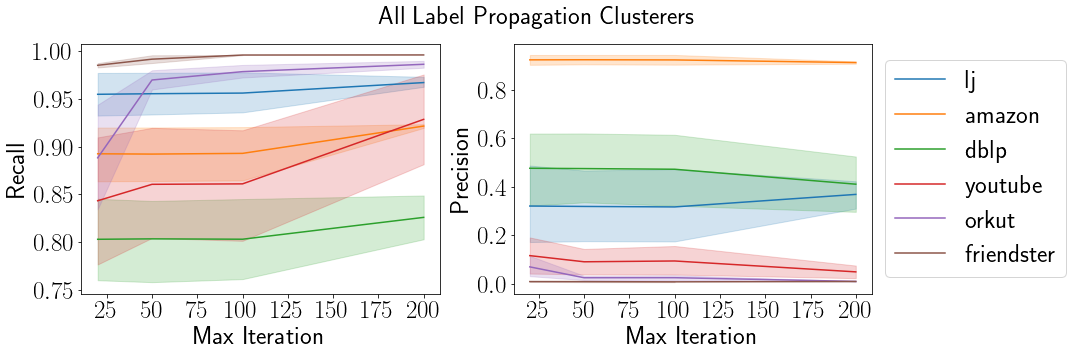

In [305]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - label_stats.csv")
replace_graph_names(df)
df = df.dropna(how='all')
df = df[df["Clusterer Name"] != "NetworKitLPDegreeOrdered"]

# df_nk_neo4j = df[df['Config'].str.contains(r'maxIterations: 20(?:,|$)', na=False)]
# df_us = df[df['Config'].str.contains(r'max_iteration: 20(?:,|$)', na=False)]
# df_tg = df[df['Config'].str.contains(r'maximum_iteration: 20(?:,|$)', na=False)]
df = df[df["Config"] != ""]
df['num_iteration'] = df['Config'].str.extract('max(?:imum)?_?iterations?: (\d+)', flags=re.IGNORECASE).astype(int)
df = df[df['num_iteration'].isin([20, 50, 100, 200])]


# Create a 1x2 subplot (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("All Label Propagation Clusterers", fontsize=fontsize)

# Plot the first line plot on the top-left axis
sns.lineplot(data=df, x="num_iteration", y="communityRecall_mean", hue="Input Graph", ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# axes[0].set_title("Community Recall by Num Iteration")
axes[0].set_ylabel("Recall", fontsize=fontsize)
axes[0].set_xlabel("Max Iteration", fontsize=fontsize)

axes[0].get_legend().remove()
set_ax_ticks(axes[0])

# Plot the second line plot on the top-right axis
sns.lineplot(data=df, x="num_iteration", y="communityPrecision_mean", hue="Input Graph", ax=axes[1])
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
# axes[1].set_title("Community Precision by Num Iteration")
axes[1].set_ylabel("Precision", fontsize=fontsize)
axes[1].set_xlabel("Max Iteration", fontsize=fontsize)
set_ax_ticks(axes[1])



# Adjust layout
plt.tight_layout()
plt.savefig("../results/out_lp_parameters.pdf", bbox_inches='tight')

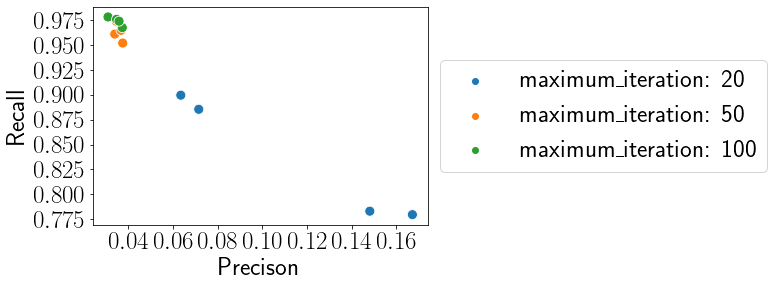

In [91]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - label_stats.csv")
replace_graph_names(df)
df = df[df["Clusterer Name"] == "TigerGraphLabelProp"]
df = df[df["Input Graph"] == "orkut"]


ax = sns.scatterplot(df, x="communityPrecision_mean", y="communityRecall_mean", hue="Config",s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize)
set_ax_ticks(ax)
plt.xlabel("Precison", fontsize = fontsize)
plt.ylabel("Recall", fontsize = fontsize)
plt.savefig("../results/out_lp_precision_recall_tiger_orkut.pdf", bbox_inches='tight')


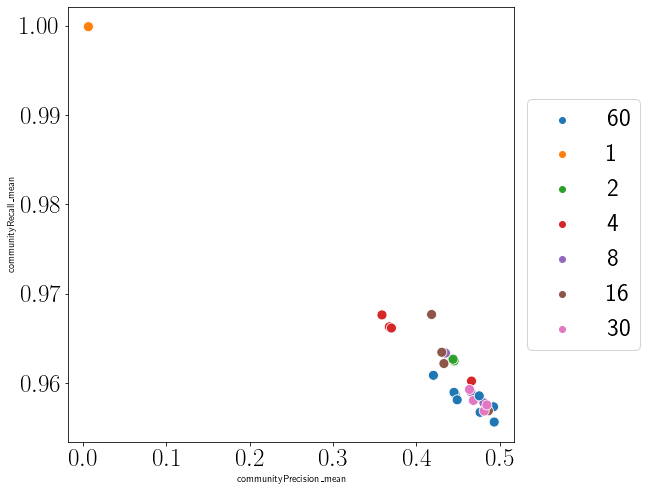

In [72]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - label_stats.csv")
replace_graph_names(df)
df = df[df["Clusterer Name"] == "LabelPropagationClusterer"]
df = df[df["Input Graph"] == "lj"]
df["Threads"] = df["Threads"].astype(int).astype(str)
plt.figure(figsize=(8, 8))  # Set the figure size

ax = sns.scatterplot(df, x="communityPrecision_mean", y="communityRecall_mean", hue="Threads",s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize)
set_ax_ticks(ax)

# g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height=4) # col_wrap decides the number of plots per row
# g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Threads",s=100)
# g.add_legend( fontsize=fontsize-5)
# set_face_grid_ax_ticks(g)
# g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
# g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set


## SLPA

In [260]:
def get_larger_handles(g, marker_size, ncol):
    g.add_legend(loc='upper center', ncol=ncol, bbox_to_anchor=(0.5, 1.15), fontsize=fontsize)
    if g._legend:
        for leg_handle in g._legend.legendHandles:
            leg_handle._sizes = [marker_size]

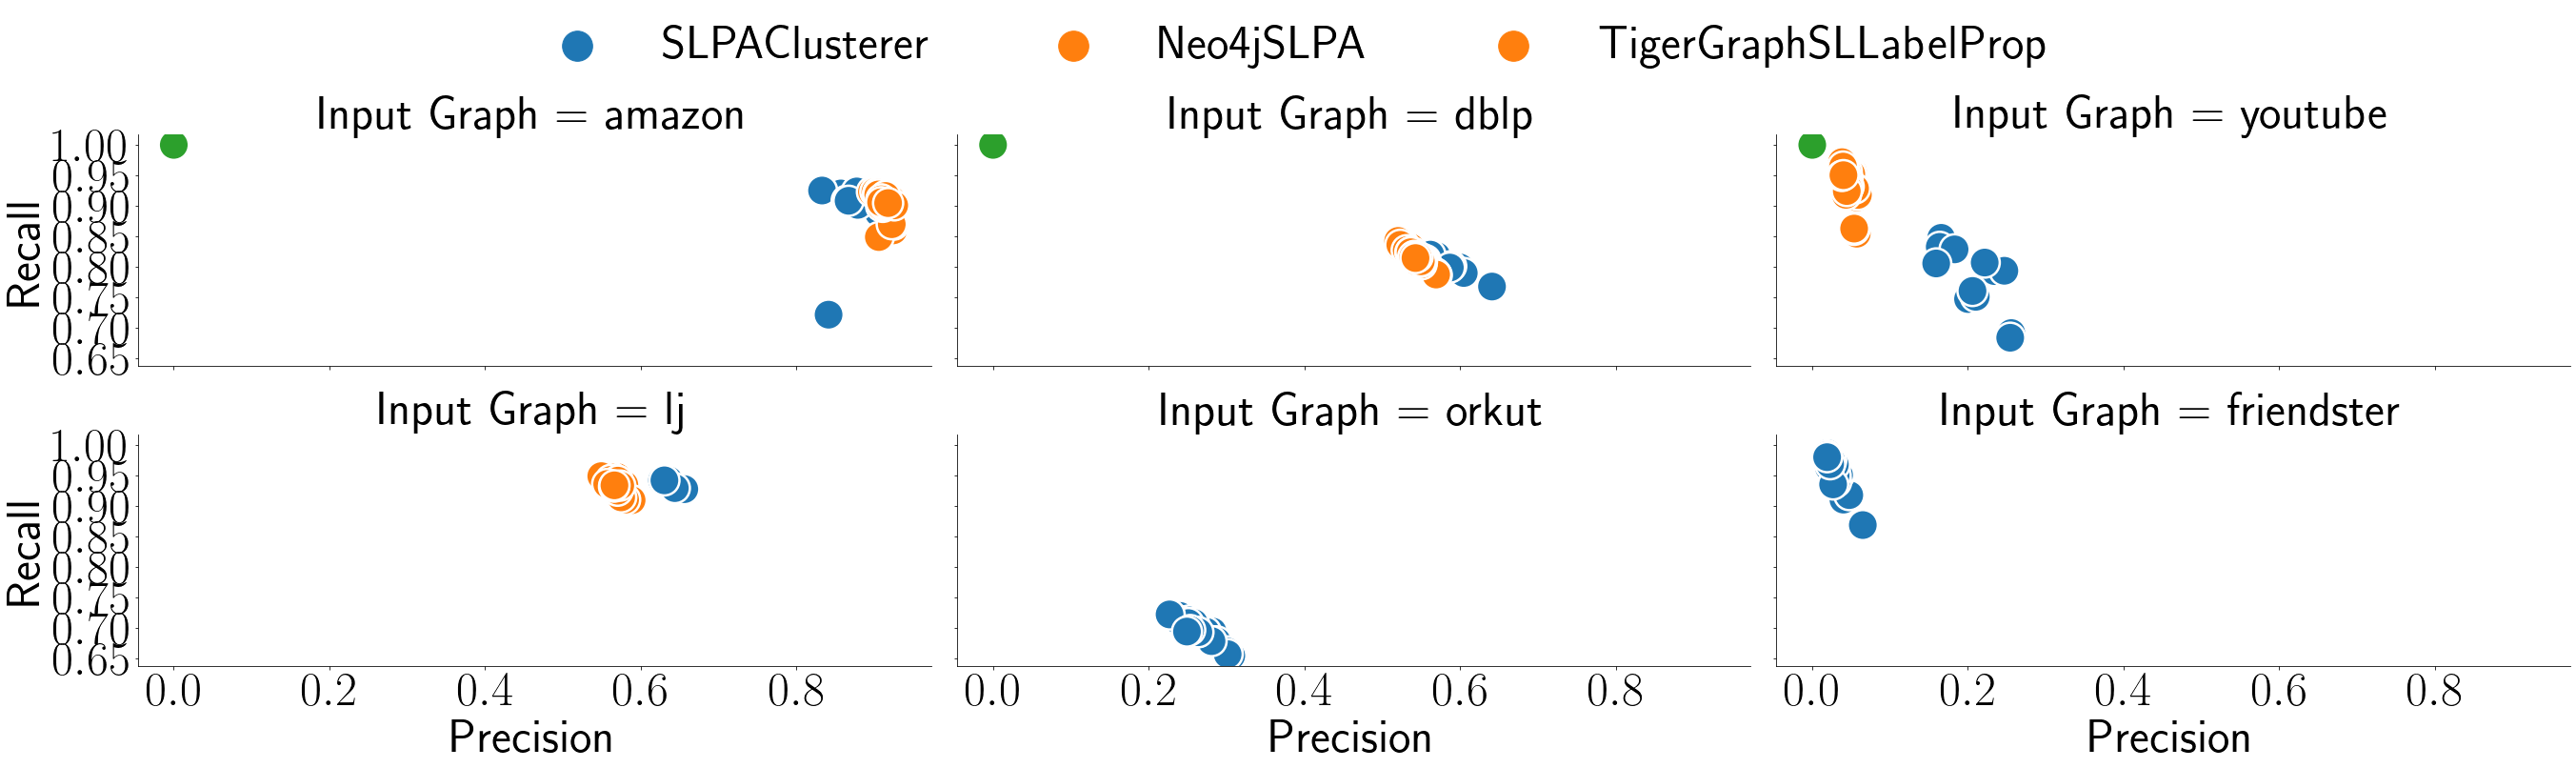

In [361]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA_stats.csv")
replace_graph_names(df)
df = df[df["Threads"] != 1]
# Create a FacetGrid, one plot per unique value in "Input Graph"
# g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height=4) # col_wrap decides the number of plots per row
# g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",s=100)
old_fontsize = fontsize
fontsize = 50
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height = 5, aspect = 1) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=1000)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 1000, 3)

set_face_grid_ax_ticks(g)
plt.tight_layout()
plt.savefig("../results/out_slpa_precision_recall.pdf", bbox_inches='tight')
fontsize=old_fontsize

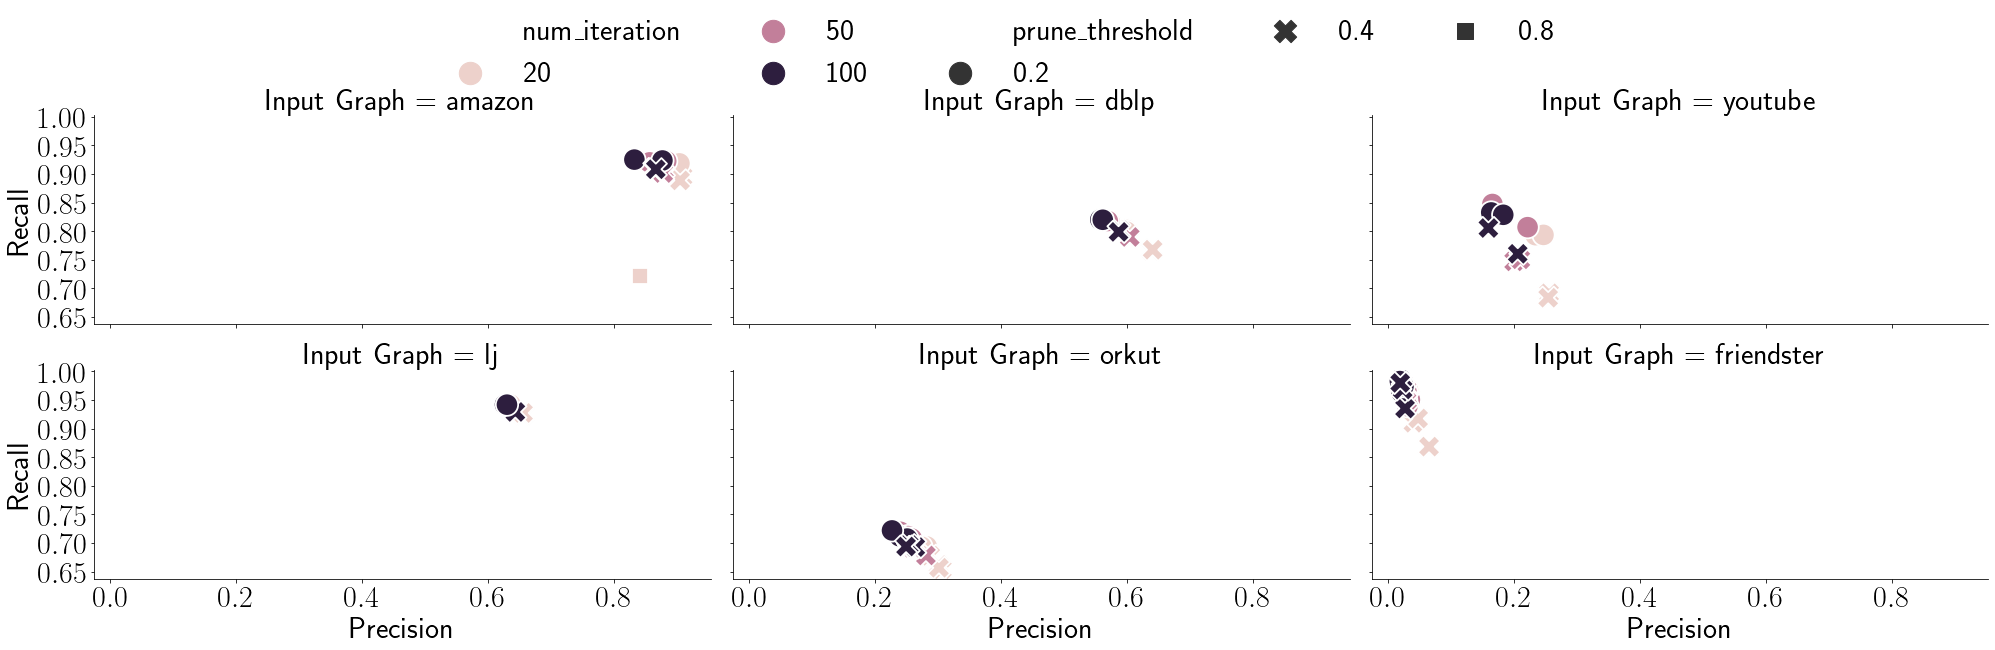

In [275]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA_stats.csv")
replace_graph_names(df)
df = df[df["Clusterer Name"] == "SLPAClusterer"]
df = df[df["Threads"] != 1]
df = df.dropna(how='all')
df['num_iteration'] = df['Config'].str.extract('max_iteration: (\d+)').astype(int)
df['prune_threshold'] = df['Config'].str.extract('prune_threshold: ([\d.]+)').astype(float)
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height=4) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="num_iteration",
                style = "prune_threshold", s=500)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 500, 5)
set_face_grid_ax_ticks(g)
plt.tight_layout()

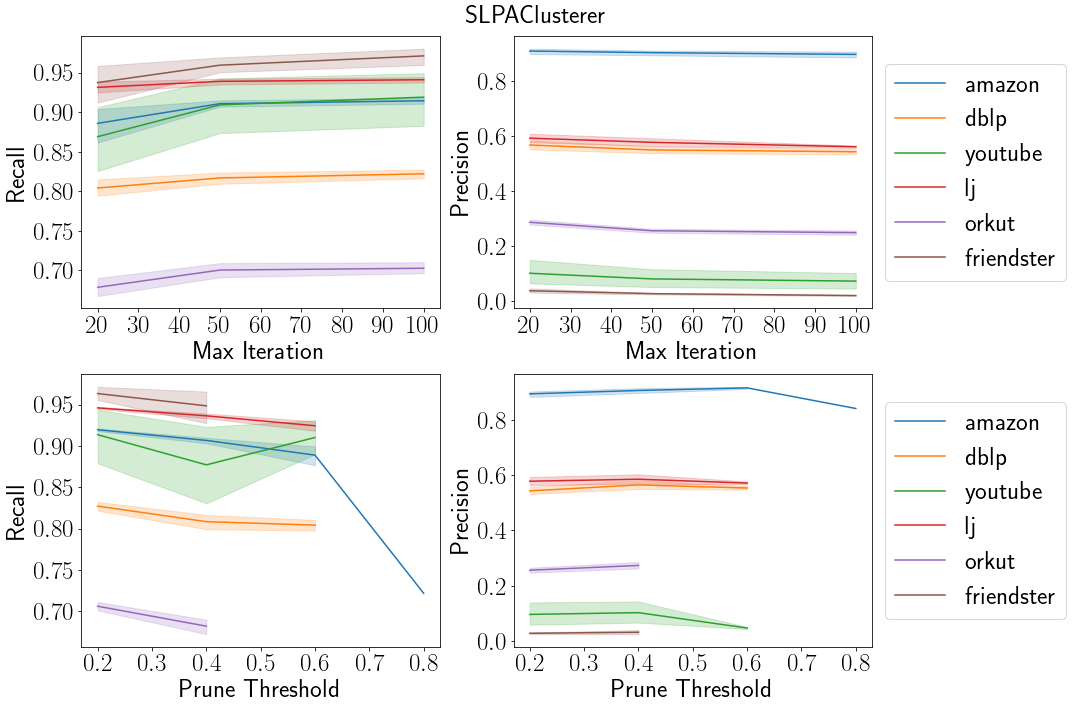

In [307]:
# Create a 1x2 subplot (one row, two columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("SLPAClusterer", fontsize=fontsize)

# Plot the first line plot on the top-left axis
sns.lineplot(data=df, x="num_iteration", y="communityRecall_mean", hue="Input Graph", ax=axes[0, 0])
axes[0, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0, 0].set_title("Community Recall by Num Iteration")

# Plot the second line plot on the top-right axis
sns.lineplot(data=df, x="num_iteration", y="communityPrecision_mean", hue="Input Graph", ax=axes[0, 1])
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0, 1].set_title("Community Precision by Num Iteration")

# Plot the third line plot on the bottom-left axis
sns.lineplot(data=df, x="prune_threshold", y="communityRecall_mean", hue="Input Graph", ax=axes[1, 0])
axes[1, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1, 0].set_title("Community Recall by Prune Threshold")

# Plot the fourth line plot on the bottom-right axis
sns.lineplot(data=df, x="prune_threshold", y="communityPrecision_mean", hue="Input Graph", ax=axes[1, 1])
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1, 1].set_title("Community Precision by Prune Threshold")


# Adjust layout
plt.tight_layout()
plt.savefig("../results/out_slpaclusterer_parameters.pdf", bbox_inches='tight')


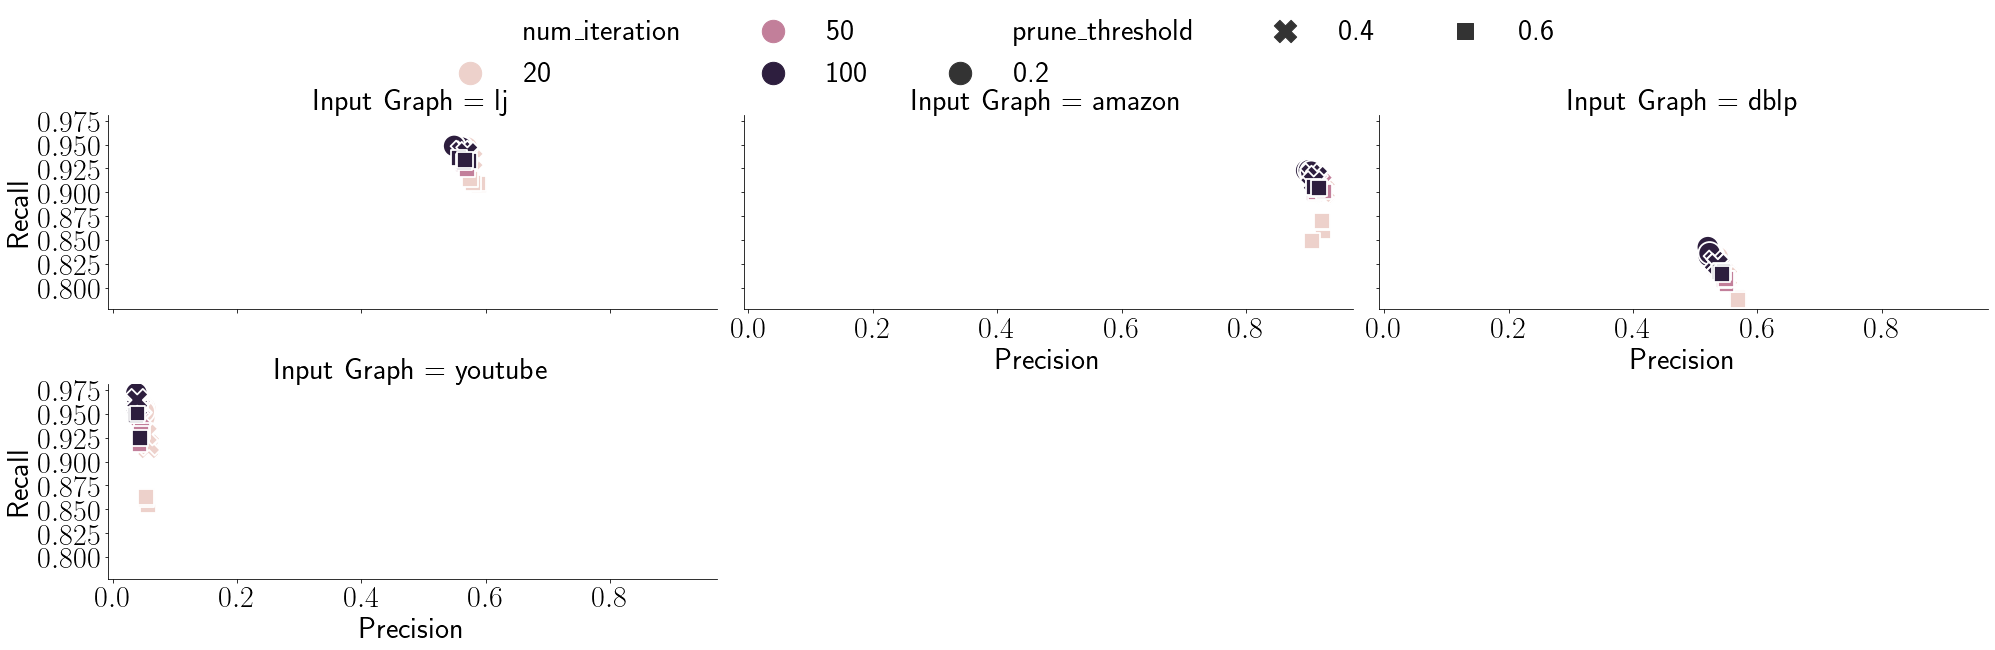

In [272]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA_stats.csv")
replace_graph_names(df)
df = df[df["Clusterer Name"] == "Neo4jSLPA"]
df = df.dropna(how='all')
df['num_iteration'] = df['Config'].str.extract('maxIterations: (\d+)').astype(int)
df['prune_threshold'] = df['Config'].str.extract('minAssociationStrength: ([\d.]+)').astype(float)
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height=4) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="num_iteration",
                style = "prune_threshold", s=500)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 500, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()

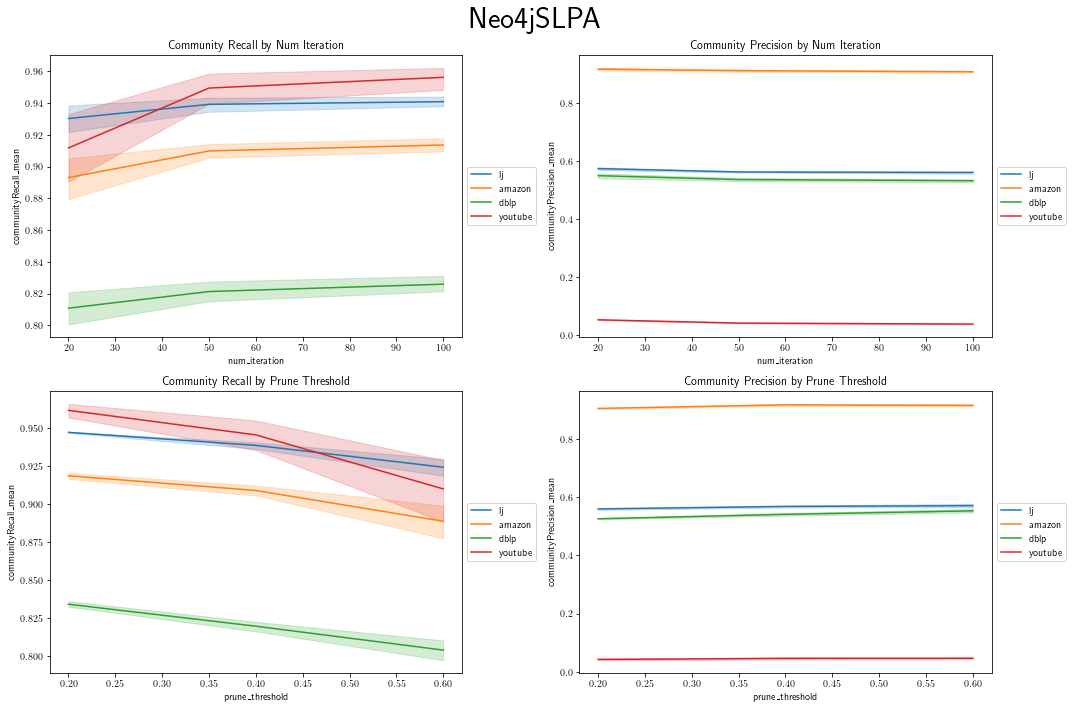

In [274]:
# Create a 1x2 subplot (one row, two columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Neo4jSLPA", fontsize=fontsize)

# Plot the first line plot on the top-left axis
sns.lineplot(data=df, x="num_iteration", y="communityRecall_mean", hue="Input Graph", ax=axes[0, 0])
axes[0, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0, 0].set_title("Community Recall by Num Iteration")

# Plot the second line plot on the top-right axis
sns.lineplot(data=df, x="num_iteration", y="communityPrecision_mean", hue="Input Graph", ax=axes[0, 1])
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0, 1].set_title("Community Precision by Num Iteration")

# Plot the third line plot on the bottom-left axis
sns.lineplot(data=df, x="prune_threshold", y="communityRecall_mean", hue="Input Graph", ax=axes[1, 0])
axes[1, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1, 0].set_title("Community Recall by Prune Threshold")

# Plot the fourth line plot on the bottom-right axis
sns.lineplot(data=df, x="prune_threshold", y="communityPrecision_mean", hue="Input Graph", ax=axes[1, 1])
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1, 1].set_title("Community Precision by Prune Threshold")


# Adjust layout
plt.tight_layout()
plt.savefig("../results/out_neo4jslpa_parameters.pdf", bbox_inches='tight')


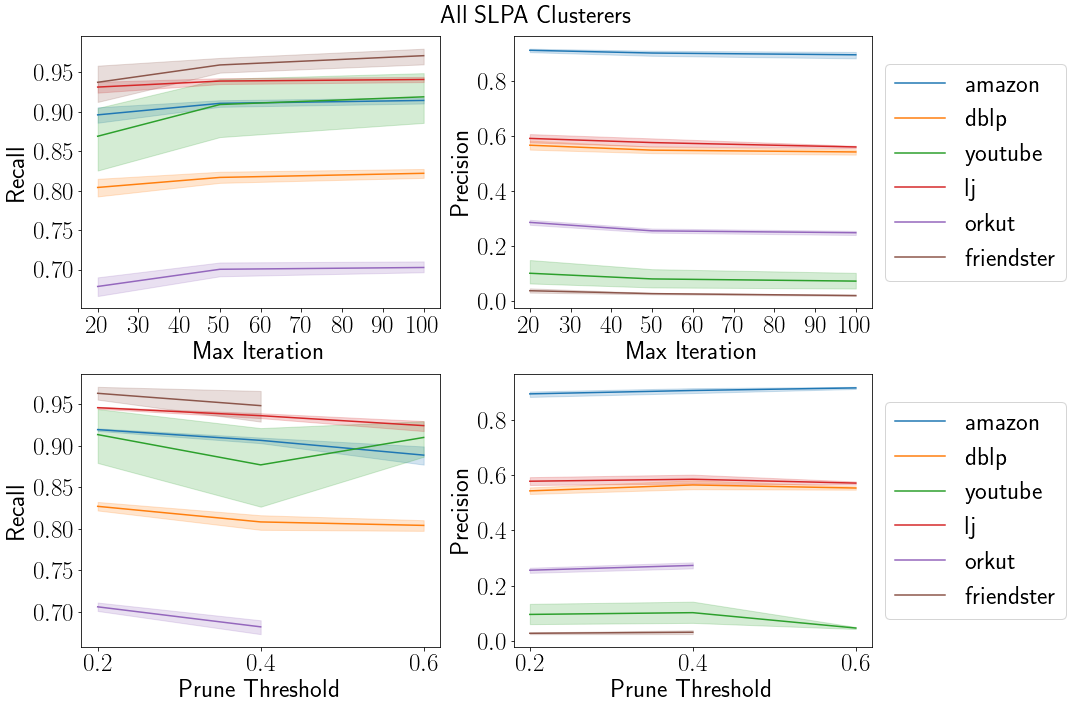

In [313]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA_stats.csv")
replace_graph_names(df)
df = df.dropna(how='all')

df = df[df["Config"] != ""]
df['num_iteration'] = df['Config'].str.extract('max(?:imum)?_?iterations?: (\d+)', flags=re.IGNORECASE).astype(int)
# df = df[df['num_iteration'].isin([20, 50, 100, 200])]
df['prune_threshold'] = df['Config'].str.extract('minAssociationStrength: ([\d.]+)|prune_threshold: ([\d.]+)').bfill(axis=1)[0].astype(float)

df = df[df['prune_threshold']!=0.8]
# Create a 12x2 subplot 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("All SLPA Clusterers", fontsize=fontsize)

# Plot the first line plot on the top-left axis
sns.lineplot(data=df, x="num_iteration", y="communityRecall_mean", hue="Input Graph", ax=axes[0, 0])
axes[0, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0, 0].set_ylabel("Recall", fontsize=fontsize)
axes[0, 0].set_xlabel("Max Iteration", fontsize=fontsize)
axes[0, 0].get_legend().remove()
set_ax_ticks(axes[0, 0])

# Plot the second line plot on the top-right axis
sns.lineplot(data=df, x="num_iteration", y="communityPrecision_mean", hue="Input Graph", ax=axes[0, 1])
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
axes[0, 1].set_ylabel("Precision", fontsize=fontsize)
axes[0, 1].set_xlabel("Max Iteration", fontsize=fontsize)
set_ax_ticks(axes[0, 1])

# Plot the third line plot on the bottom-left axis
sns.lineplot(data=df, x="prune_threshold", y="communityRecall_mean", hue="Input Graph", ax=axes[1, 0])
axes[1, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1, 0].set_ylabel("Recall", fontsize=fontsize)
axes[1, 0].set_xlabel("Prune Threshold", fontsize=fontsize)
axes[1, 0].get_legend().remove()
axes[1, 0].set_xticks(df['prune_threshold'].unique())
set_ax_ticks(axes[1, 0])

# Plot the fourth line plot on the bottom-right axis
sns.lineplot(data=df, x="prune_threshold", y="communityPrecision_mean", hue="Input Graph", ax=axes[1, 1])
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
axes[1, 1].set_ylabel("Precision", fontsize=fontsize)
axes[1, 1].set_xlabel("Prune Threshold", fontsize=fontsize)
axes[1, 1].set_xticks(df['prune_threshold'].unique())
set_ax_ticks(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.savefig("../results/out_slpa_parameters.pdf", bbox_inches='tight')

## Modularity

In [328]:
df["Clusterer Name"].unique()

array(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization',
       'NetworKitParallelLeiden', 'NetworKitPLM', nan], dtype=object)

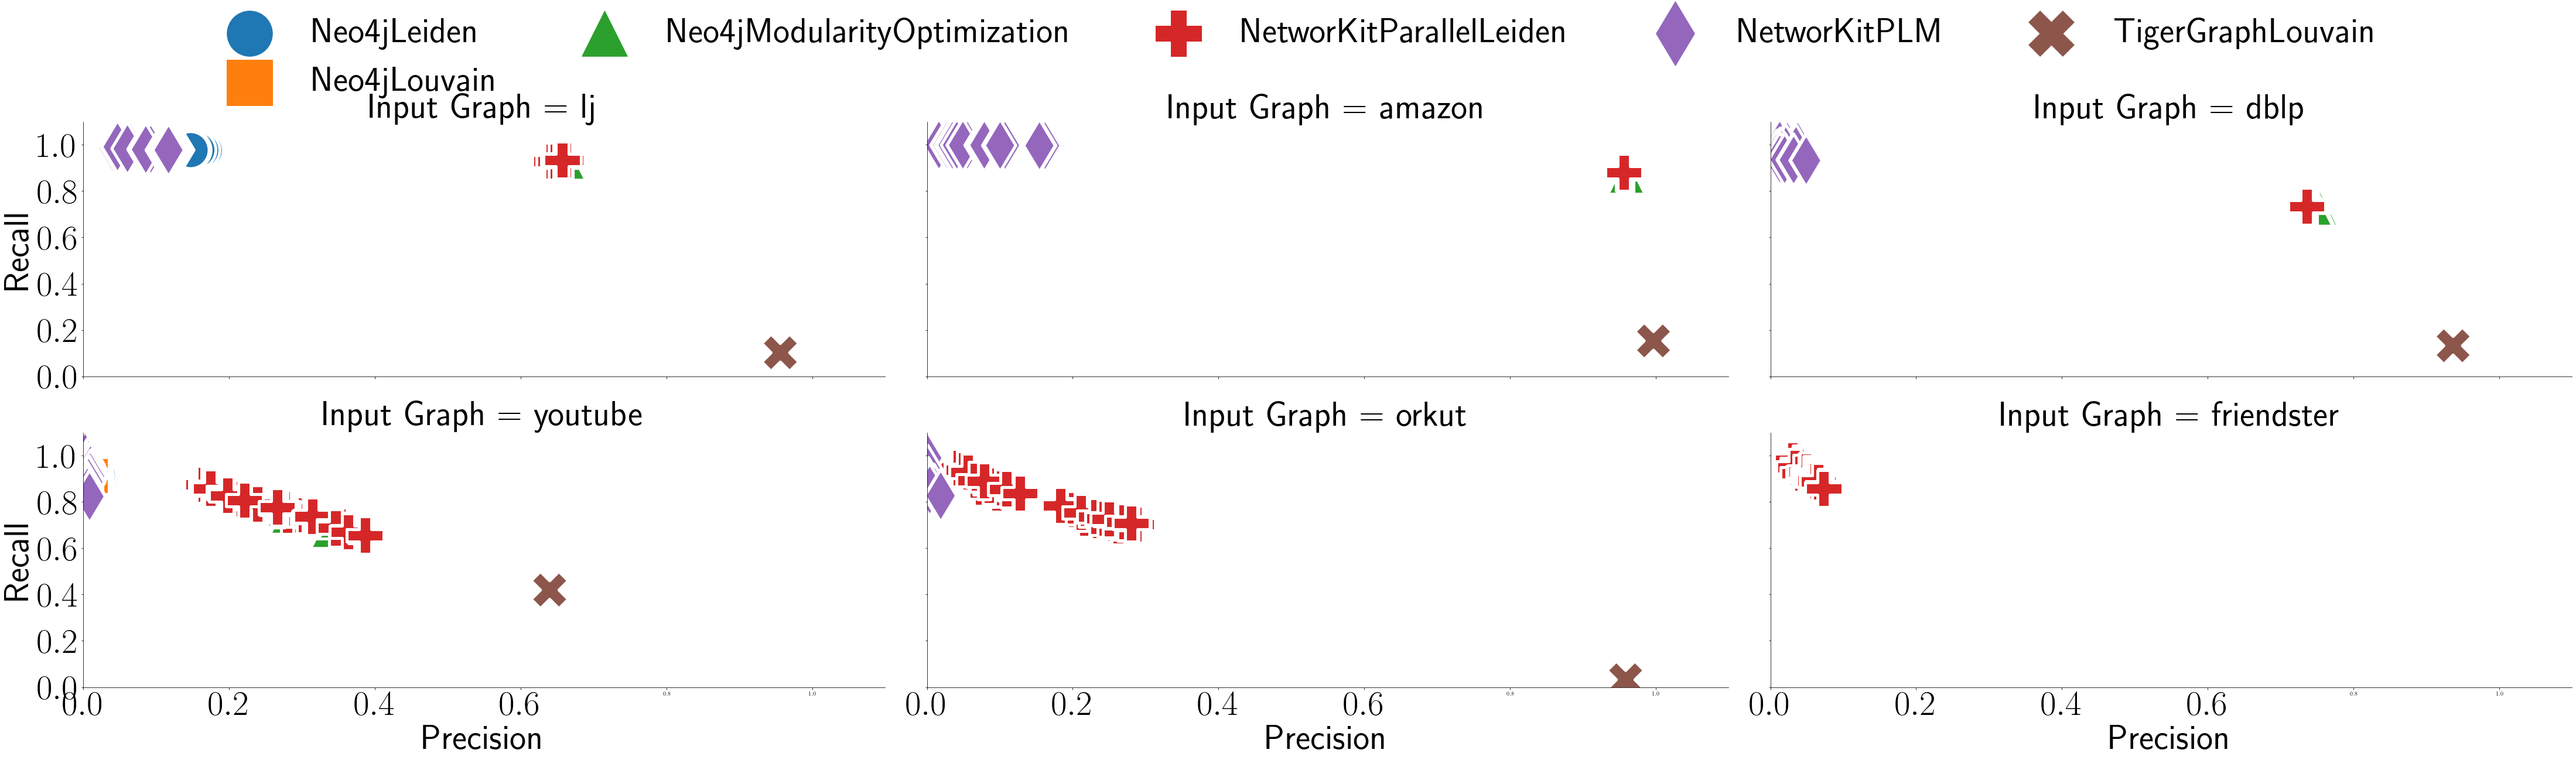

In [463]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity_stats.csv")
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity_gamma_stats.csv")
df = pd.concat([df, df2])
df = df.dropna(how='all')
replace_graph_names(df)
values = ['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization',
         'NetworKitParallelLeiden', 'NetworKitPLM', "TigerGraphLouvain"]

# cmap = plt.cm.viridis
# colors = cmap(np.linspace(0, 1, len(values)))

# Using 'tab10' colormap
cmap = plt.cm.tab10

# Ensure there are enough colors for the values
assert len(values) <= cmap.N, "Not enough colors in the colormap for the values"

colors = [cmap(i) for i in range(len(values))]

color_map = dict(zip(values, colors))

# Define a list of marker styles
marker_styles = ['o', 's', '^', 'P', 'd', 'X']

# Create a style_map that maps each value in values to a marker style
style_map = dict(zip(values, marker_styles))


old_fontsize = fontsize
fontsize = 60
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height = 8, aspect =0.4, xlim=(0, 1.1), ylim=(0,1.1)) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=4000, style="Clusterer Name", palette = color_map,  markers=style_map)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 6000, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
plt.savefig("../results/out_md_precision_recall.pdf", bbox_inches='tight')
fontsize=old_fontsize

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/772525451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nkleiden["gamma"] = df_nkleiden['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)


Text(0.5, 1.0, 'Networkit Parallel Leiden')

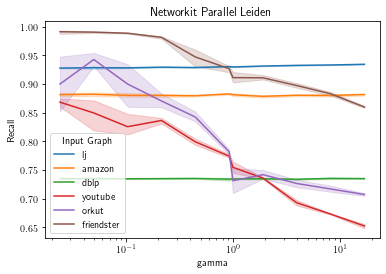

In [459]:
df_nkleiden = df[df["Clusterer Name"].isin(['NetworKitParallelLeiden'])]
df_nkleiden["gamma"] = df_nkleiden['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)
sns.lineplot(data=df_nkleiden, x="gamma", y="communityRecall_mean", hue="Input Graph")
plt.xscale('log')
plt.ylabel("Recall")
plt.title("Networkit Parallel Leiden")

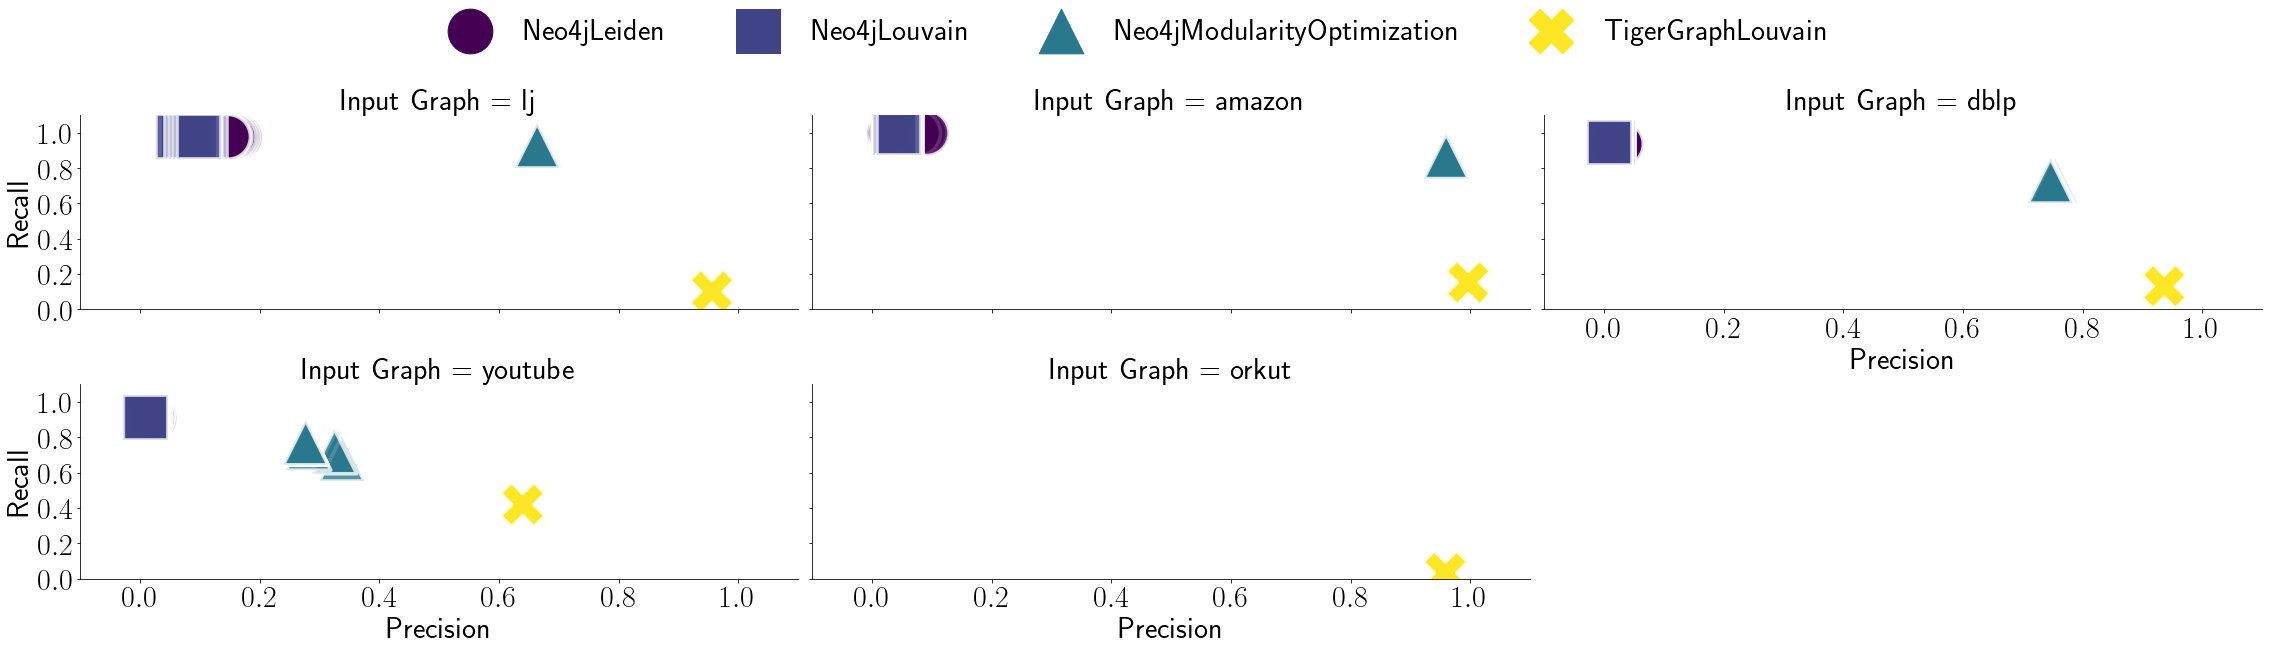

In [462]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity_stats.csv")
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity_gamma_stats.csv")
df = pd.concat([df, df2])
df = df.dropna(how='all')
replace_graph_names(df)
values = ['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization',
         'NetworKitParallelLeiden', 'NetworKitPLM', "TigerGraphLouvain"]

# Using a predefined colormap 'viridis'
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = cmap(np.linspace(0, 1, len(values)))

color_map = dict(zip(values, colors))

# Define a list of marker styles
marker_styles = ['o', 's', '^', 'P', 'D', 'X']

# Create a style_map that maps each value in values to a marker style
style_map = dict(zip(values, marker_styles))


old_fontsize = fontsize
fontsize = 30
g = sns.FacetGrid(df[df["Clusterer Name"].isin([ 'Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization',
          "TigerGraphLouvain"])], col="Input Graph", col_wrap=3, height = 4, aspect =1, xlim=(-0.1, 1.1), ylim=(0,1.1)) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=2000, style="Clusterer Name", palette = color_map,  markers=style_map, alpha=0.8)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 2000, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
fontsize=old_fontsize


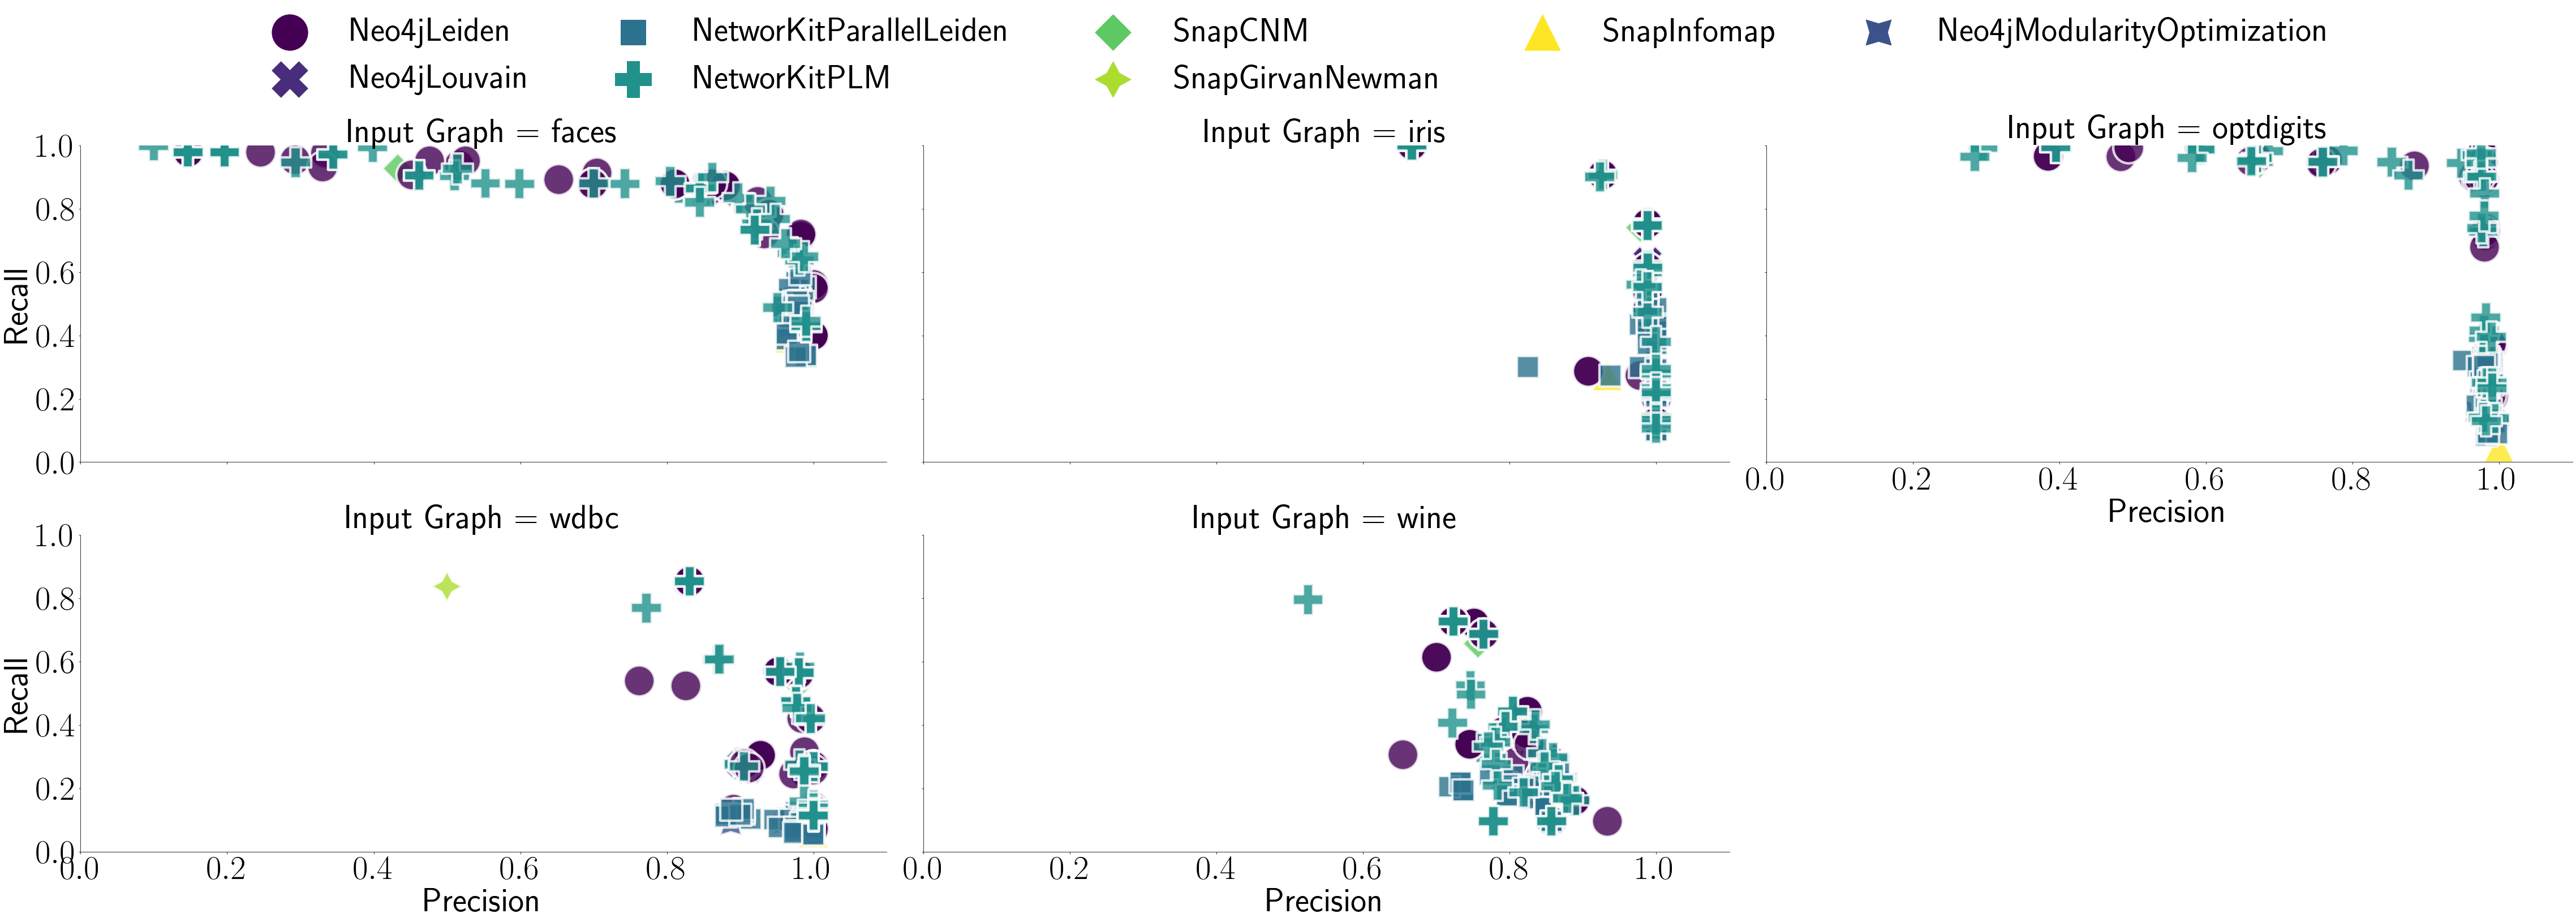

In [445]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats.csv")
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats_gamma.csv")
df = pd.concat([df, df2])
df = df.dropna(how='all')
replace_graph_names(df)
values = ['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
         'NetworKitParallelLeiden', 'NetworKitPLM', "TigerGraphLouvain", 'SnapCNM', 'SnapGirvanNewman', 'SnapInfomap']

# Using a predefined colormap 'viridis'
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = cmap(np.linspace(0, 1, len(values)))

color_map = dict(zip(values, colors))

old_fontsize = fontsize
fontsize = 60
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height = 10, aspect =0.4, xlim=(0, 1.1), ylim=(0,1)) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=3000, palette = color_map, style="Clusterer Name", alpha = 0.8)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 4000, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
plt.savefig("../results/out_md_precision_recall_uci.pdf", bbox_inches='tight')
fontsize=old_fontsize

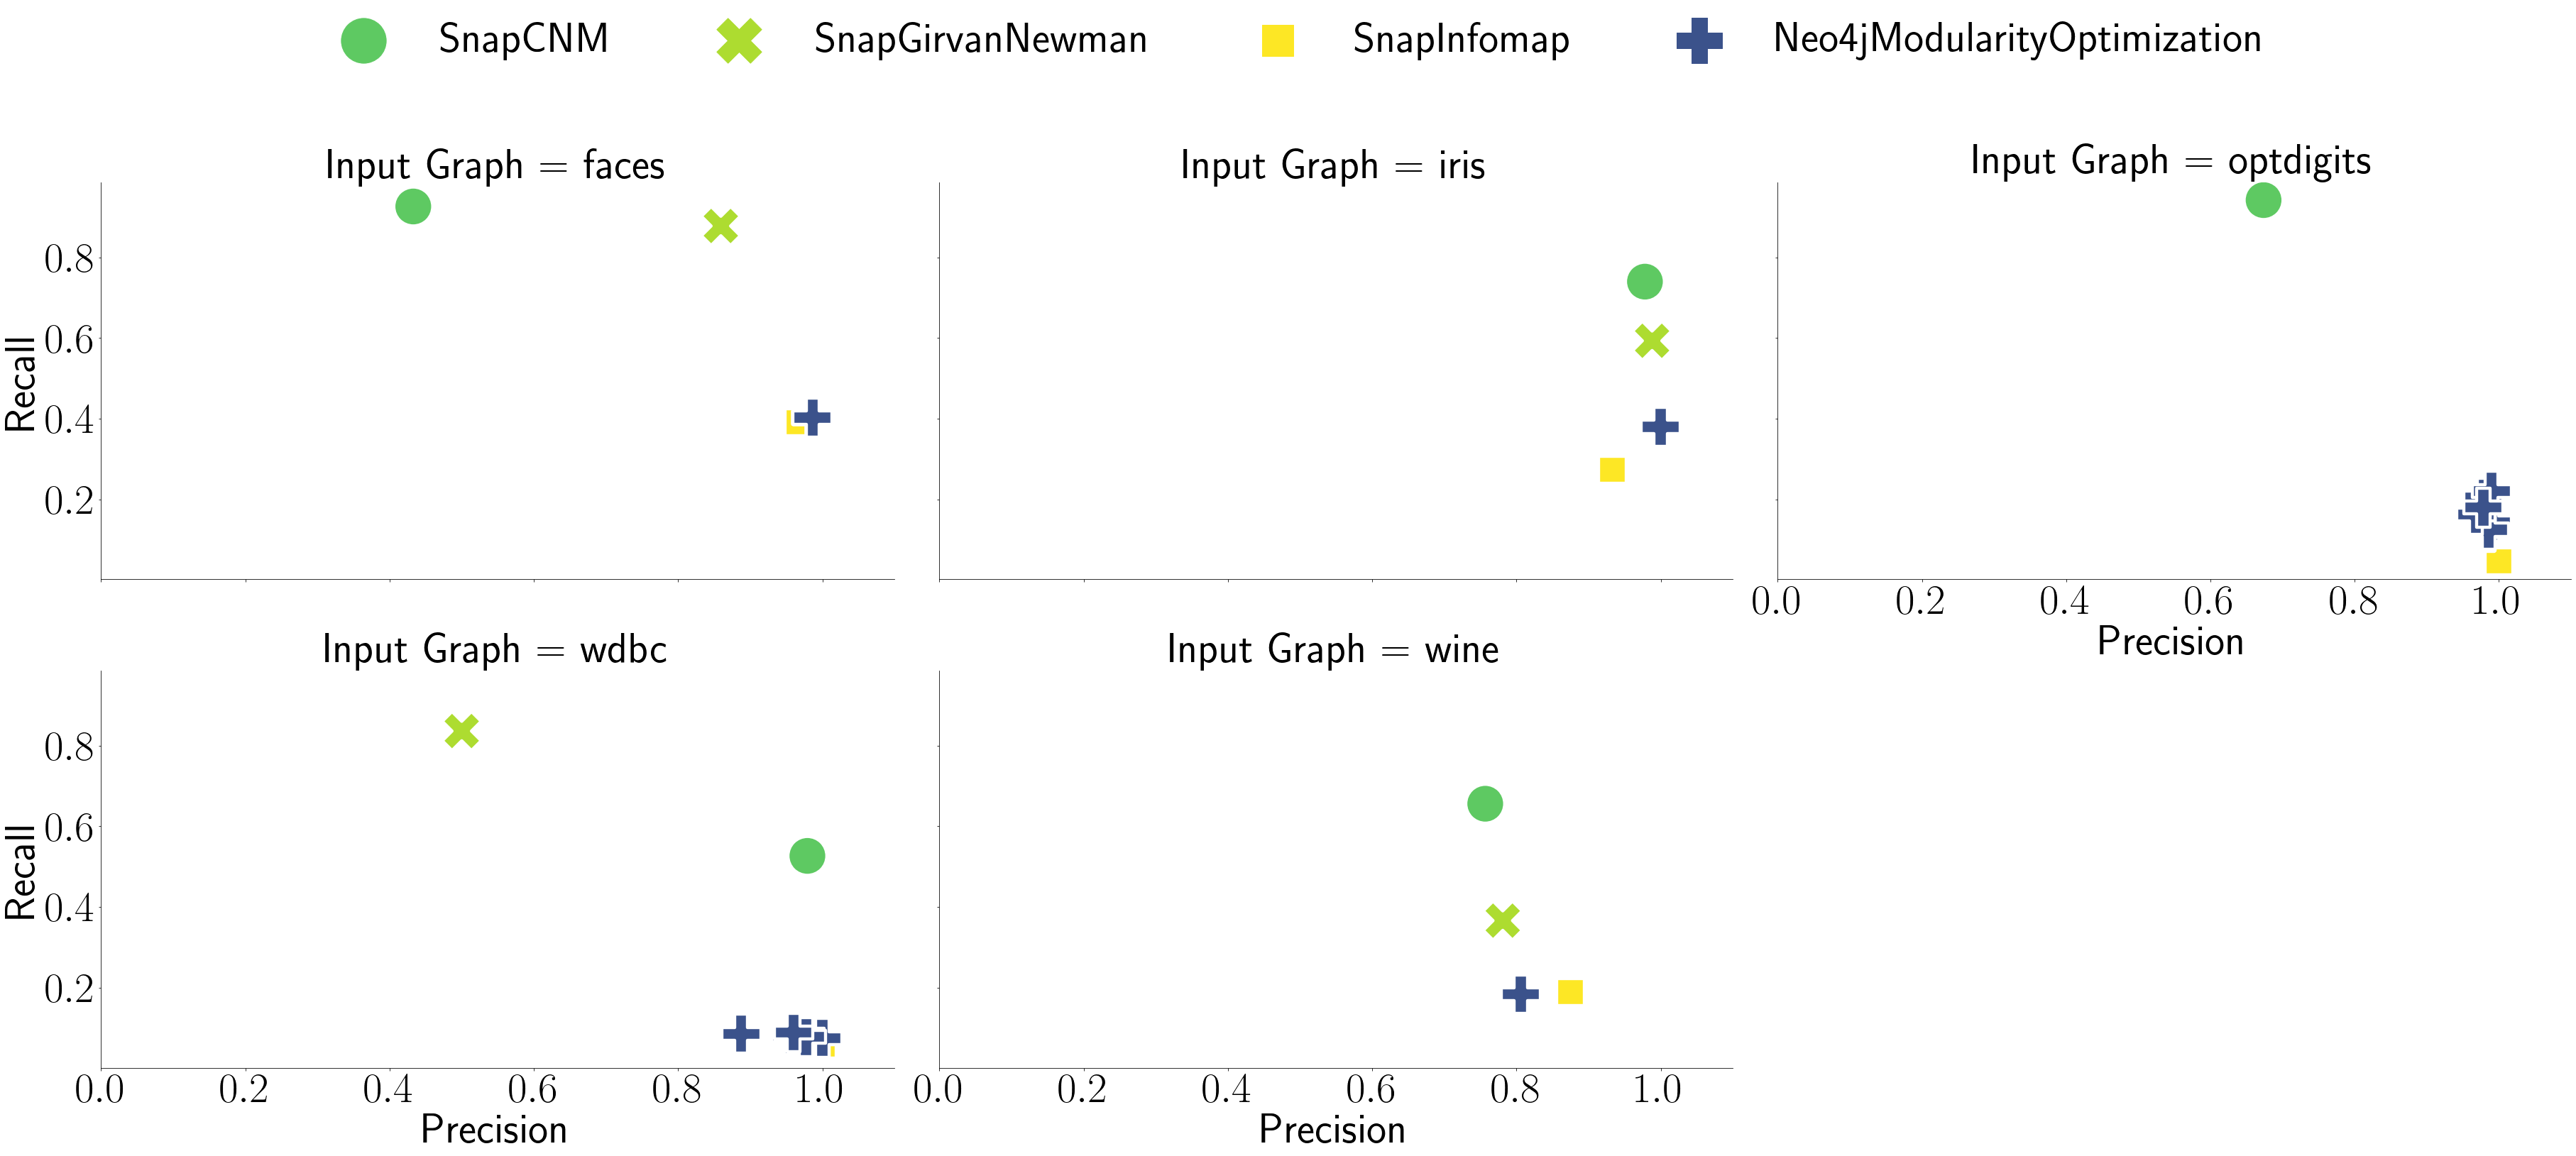

In [431]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats.csv")
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats_gamma.csv")
df = pd.concat([df, df2])
df = df.dropna(how='all')
replace_graph_names(df)

values = ['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
         'NetworKitParallelLeiden', 'NetworKitPLM', "TigerGraphLouvain", 'SnapCNM', 'SnapGirvanNewman', 'SnapInfomap']

# Using a predefined colormap 'viridis'
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = cmap(np.linspace(0, 1, len(values)))

color_map = dict(zip(values, colors))


old_fontsize = fontsize
fontsize = 60
g = sns.FacetGrid(df[df["Clusterer Name"].isin([ 
   'Neo4jModularityOptimization', 
      "TigerGraphLouvain", 'SnapCNM', 'SnapGirvanNewman', 'SnapInfomap' ])],
                col="Input Graph", col_wrap=3, height = 10, aspect =0.4, xlim=(0, 1.1)) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=3000, palette = color_map, style="Clusterer Name")

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 4000, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
fontsize=old_fontsize

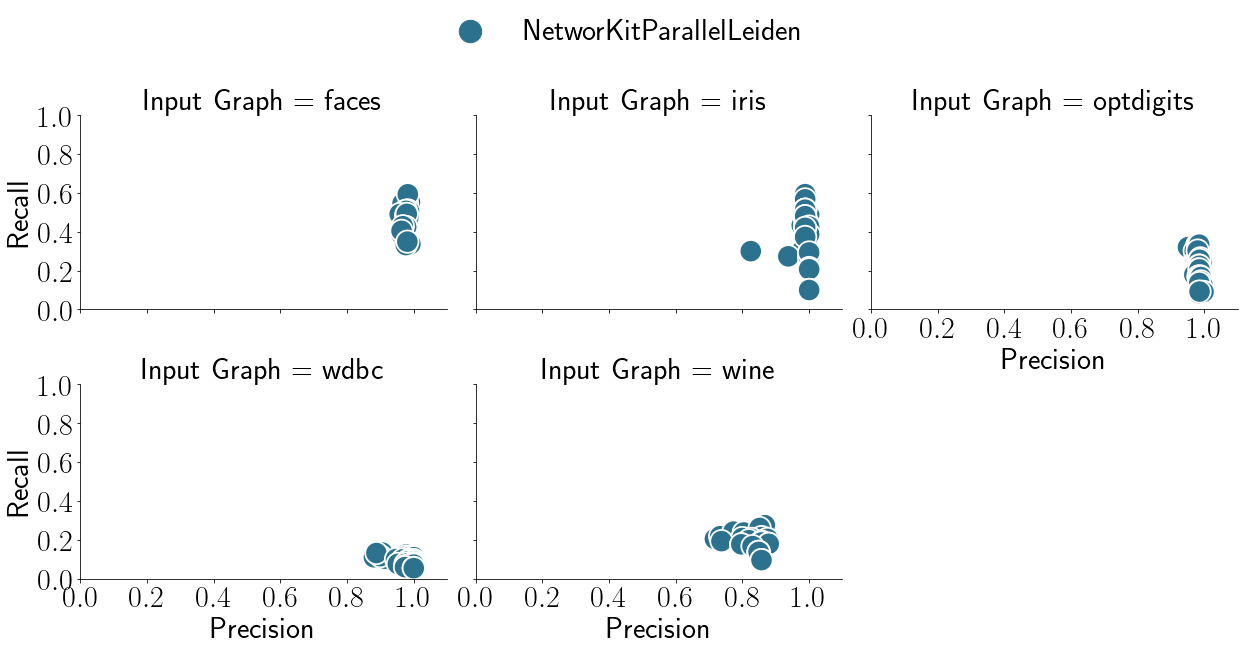

In [438]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats.csv")
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/ParClusterer Results UCI - Modularity_stats_gamma.csv")
df = pd.concat([df, df2])
df = df.dropna(how='all')
replace_graph_names(df)

values = ['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
         'NetworKitParallelLeiden', 'NetworKitPLM', "TigerGraphLouvain", 'SnapCNM', 'SnapGirvanNewman', 'SnapInfomap']

# Using a predefined colormap 'viridis'
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = cmap(np.linspace(0, 1, len(values)))

color_map = dict(zip(values, colors))


old_fontsize = fontsize
fontsize = 30
g = sns.FacetGrid(df[df["Clusterer Name"].isin([ 
   'NetworKitParallelLeiden'])],
                col="Input Graph", col_wrap=3, height = 4, aspect =1, xlim=(0, 1.1), ylim=(0,1)) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=500, palette = color_map, style="Clusterer Name")

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
get_larger_handles(g, 500, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
fontsize=old_fontsize

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/772525451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nkleiden["gamma"] = df_nkleiden['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)


Text(0.5, 1.0, 'Networkit Parallel Leiden')

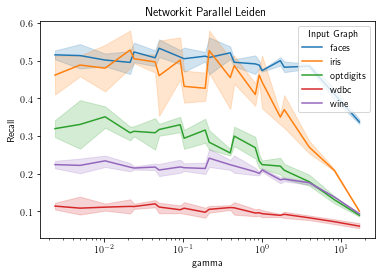

In [399]:
df_nkleiden = df[df["Clusterer Name"].isin(['NetworKitParallelLeiden'])]
df_nkleiden["gamma"] = df_nkleiden['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)
sns.lineplot(data=df_nkleiden, x="gamma", y="communityRecall_mean", hue="Input Graph")
plt.xscale('log')
plt.ylabel("Recall")
plt.title("Networkit Parallel Leiden")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/1805602529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nkplm["gamma"] = df_nkplm['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)


<AxesSubplot:xlabel='gamma', ylabel='communityRecall_mean'>

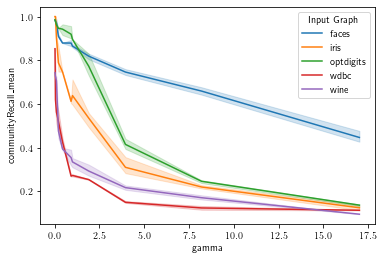

In [393]:
df_nkplm = df[df["Clusterer Name"].isin(['NetworKitPLM'])]
df_nkplm["gamma"] = df_nkplm['Config'].str.extract('gamma: ([\d.]+)').bfill(axis=1)[0].astype(float)
sns.lineplot(data=df_nkplm, x="gamma", y="communityRecall_mean", hue="Input Graph")

## Tectonic

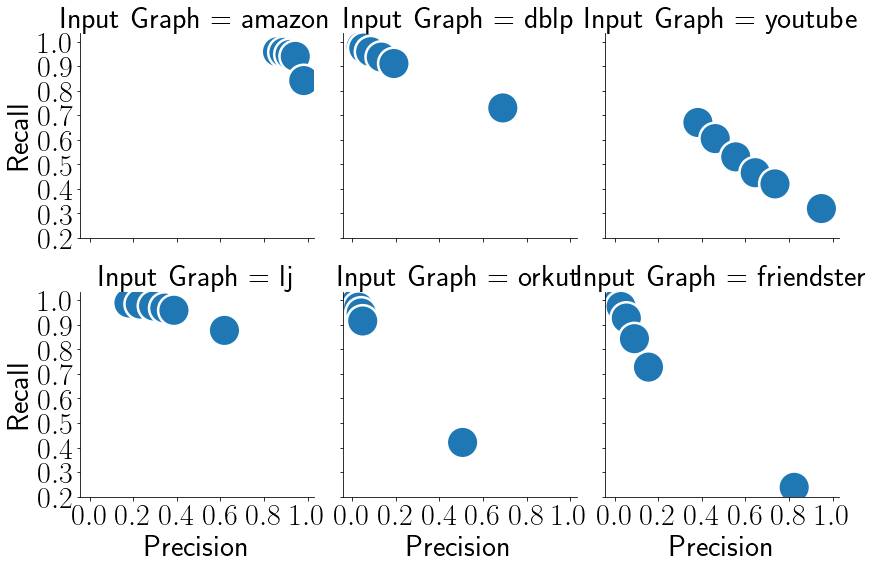

In [349]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Tectonic_stats.csv")
df = df.dropna(how='all')
replace_graph_names(df)
df = df[df["Clusterer Name"] == "TectonicClusterer"]
df = df[df['Config'].str.contains('false', na=False)]

old_fontsize = fontsize
fontsize = 30
g = sns.FacetGrid(df, col="Input Graph", col_wrap=3, height = 4, aspect =1) # col_wrap decides the number of plots per row
g.map_dataframe(sns.scatterplot, x="communityPrecision_mean", y="communityRecall_mean", hue="Clusterer Name",
                s=1000)

g.set_titles(size=fontsize)  # Set title font size for FacetGrid plots
g.set_axis_labels("Precision", "Recall", fontsize=fontsize)  # Set

# Add a legend
# get_larger_handles(g, 1000, 5)

set_face_grid_ax_ticks(g)
plt.tight_layout()
plt.savefig("../results/out_tectonic_precision_recall.pdf", bbox_inches='tight')
fontsize=old_fontsize

## Runtime Compare

In [204]:
fontsize=25

In [192]:
def plot_runtime_compare(df, base, filename):
    replace_graph_names(df)

    df_avg = df.groupby(['Clusterer Name', 'Input Graph'])['Cluster Time'].mean().reset_index()

    ## compute "speedup", actually the slowdown
    df_base = df_avg[df_avg["Clusterer Name"]==base]
    df_base = df_base.rename(columns={'Cluster Time': 'Base Time'})
    df_base = df_base.drop(columns=["Clusterer Name"])
    df_avg = df_avg.merge(df_base, on=['Input Graph'])
    df_avg["Speedup"] =  df_avg["Cluster Time"] / df_avg["Base Time"] 

    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=df_avg, x='Input Graph', y='Speedup', hue='Clusterer Name', palette='viridis',
                    order=["amazon", "youtube", "dblp", "lj", "orkut", "friendster"])
    plt.title('Slowndown w.r.t. ' + base, fontsize=fontsize-5)
    plt.ylabel('Slowdown', fontsize=fontsize-5)
    plt.xlabel('Graph', fontsize=fontsize-5)

    plt.yscale('log')
#     plt.yticks([1, 10, 100, 1e3, 1e4])
    plt.legend(loc='upper right')
    set_ax_ticks(ax)

    plt.tight_layout()
    plt.savefig(filename)


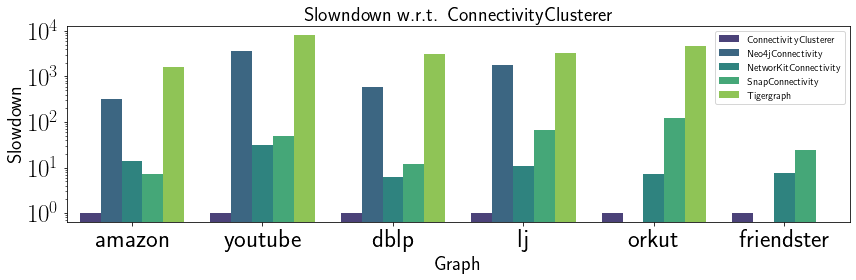

In [193]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - WCC_runtime_compare.csv")
plot_runtime_compare(df, "ConnectivityClusterer" ,"../results/out_wcc_slowdown.pdf")

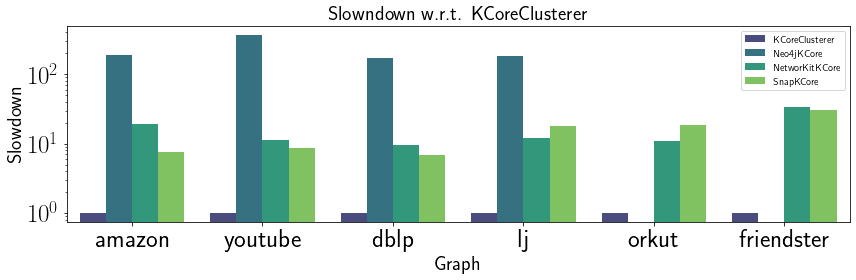

In [207]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - KCore_runtime_compare.csv")
plot_runtime_compare(df, "KCoreClusterer" ,"../results/out_kcore_slowdown.pdf")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/4229383703.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


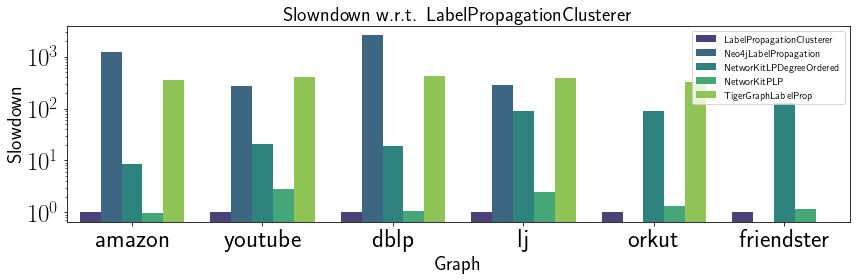

In [195]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - LP_runtime_compare.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_nk_neo4j = df[df['Config'].str.contains(r'maxIterations: 20(?:,|$)', na=False)]
df_us = df[df['Config'].str.contains(r'max_iteration: 20(?:,|$)', na=False)]
df_tg = df[df['Config'].str.contains(r'maximum_iteration: 20(?:,|$)', na=False)]
df_dlp = df[df["Clusterer Name"]=="NetworKitLPDegreeOrdered"]
df = pd.concat([df_nk_neo4j, df_us, df_tg, df_dlp])

plot_runtime_compare(df, "LabelPropagationClusterer" ,"../results/out_lp_slowdown.pdf")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/3392296988.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


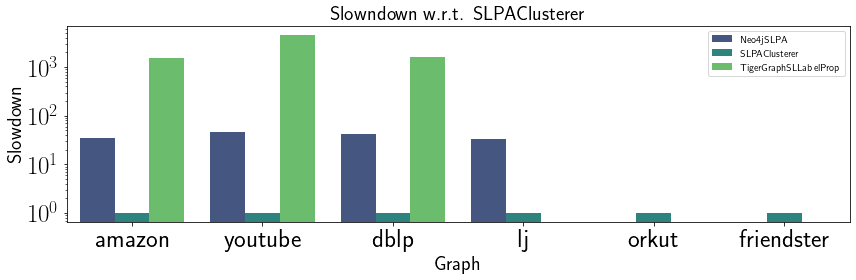

In [358]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_neo4j = df[df['Config']=="maxIterations: 20,minAssociationStrength: 0.2"]
df_us = df[df['Config']=="max_iteration: 20,remove_nested: false,prune_threshold: 0.2"]
df_tg = df[df['Config']=="maximum_iteration: 20,threshold: 0.2"]
df = pd.concat([df_neo4j, df_us, df_tg])

plot_runtime_compare(df, "SLPAClusterer" ,"../results/out_slpa_slowdown.pdf")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/3780590507.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


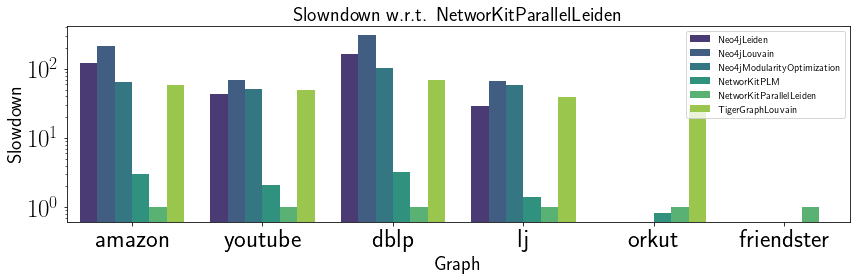

In [359]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df = df[df['Config'].isin(["gamma: 1,iterations: 10", "use_refine: False,gamma: 1,maxIter: 10,recurse: True",
                             "gamma: 1,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
                              "maxIterations: 10,minCommunitySize: 2", "maxIterations: 10"
                             ])]
plot_runtime_compare(df, "NetworKitParallelLeiden" ,"../results/out_md_slowdown.pdf")